In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler


## Combination of over- and under-sampling With Evaluation

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['HeartDisease'].value_counts()

HeartDisease
0    252861
1     26938
Name: count, dtype: int64

## splite data

In [6]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [7]:
smote_enn = SMOTEENN(random_state=42)
x_ST, y_ST = smote_enn.fit_resample(x, y)
x_train7, x_test7, y_train7, y_test7 = train_test_split(x_ST, y_ST, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train7 = scaler.fit_transform(x_train7)
x_test7 = scaler.transform(x_test7)

## Random Forest

In [9]:


# rf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train7, y_train7)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 200,  # Liczba drzew
    'max_depth': 30,        # Maksymalna głębokość drzewa
    'min_samples_split': 4,   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': 1,    # Minimalna liczba próbek wymagana w liściu
    'max_features':'sqrt' # Liczba cech do rozważenia przy każdym podziale
}

rf_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
rf_clf.fit(x_train7, y_train7)

# Predykcje i ocena modelu
ypred_train = rf_clf.predict(x_train7)
ypred_test = rf_clf.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train))
print("Test Results\n")
print(classification_report(y_test7, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test7, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(rf_clf, x_train7, y_train7, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    133334
           1       1.00      0.99      0.99    161543

    accuracy                           0.99    294877
   macro avg       0.99      0.99      0.99    294877
weighted avg       0.99      0.99      0.99    294877

Test Results

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     44549
           1       0.97      0.96      0.97     53744

    accuracy                           0.97     98293
   macro avg       0.97      0.97      0.97     98293
weighted avg       0.97      0.97      0.97     98293

Confusion Matrix:
 [[43122  1427]
 [ 1920 51824]]
Cross-validation scores: [0.96468055 0.96507054 0.96439169 0.96484951 0.96423908]
Average cross-validation score: 0.9646462746889861


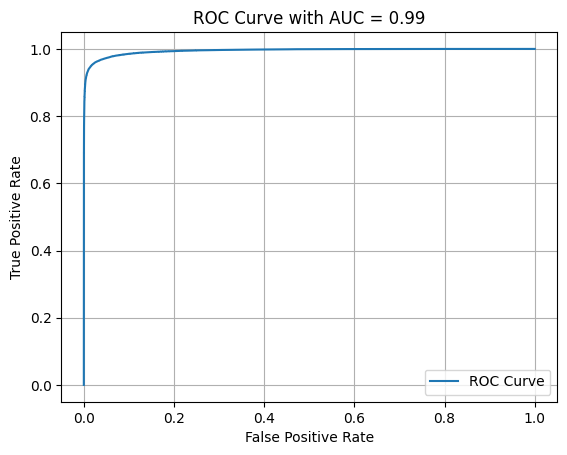

In [10]:


y_proba_test = rf_clf.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:

# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train7, y_train7)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train7, y_train7)

params = {
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'criterion': 'entropy'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion'])
best_tree.fit(x_train7, y_train7)


ypred_train2 = best_tree.predict(x_train7)
ypred_test2 = best_tree.predict(x_test7)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train7, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test7, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    133334
           1       0.99      0.97      0.98    161543

    accuracy                           0.98    294877
   macro avg       0.98      0.98      0.98    294877
weighted avg       0.98      0.98      0.98    294877

Testing Results

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44549
           1       0.96      0.94      0.95     53744

    accuracy                           0.95     98293
   macro avg       0.95      0.95      0.95     98293
weighted avg       0.95      0.95      0.95     98293

Cross-Validation Scores for the Best Model: [0.94377374 0.94424851 0.94397626 0.94480712 0.94428148]
Average Cross-Validation Score: 0.9442174208656334


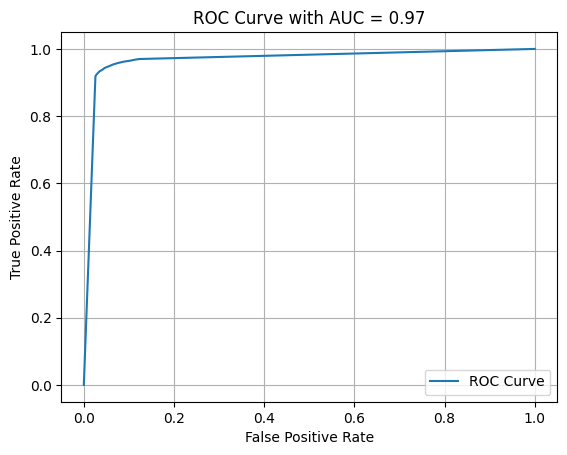

In [12]:

y_proba_test = best_tree.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train7, y_train7)
ypred_train3 = Gnb.predict(x_train7)
y_pred_test3 = Gnb.predict(x_test7)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test7, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.773513881965145


In [14]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.71      0.85      0.78    133334
           1       0.85      0.72      0.78    161543

    accuracy                           0.78    294877
   macro avg       0.78      0.79      0.78    294877
weighted avg       0.79      0.78      0.78    294877



In [15]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.71      0.85      0.77     44549
           1       0.85      0.71      0.77     53744

    accuracy                           0.77     98293
   macro avg       0.78      0.78      0.77     98293
weighted avg       0.79      0.77      0.77     98293



Cross-Validation Scores for the Best Model: [0.77953744 0.78189433 0.77437897 0.7787198  0.77799067]
Average Cross-Validation Score: 0.7785042427070152


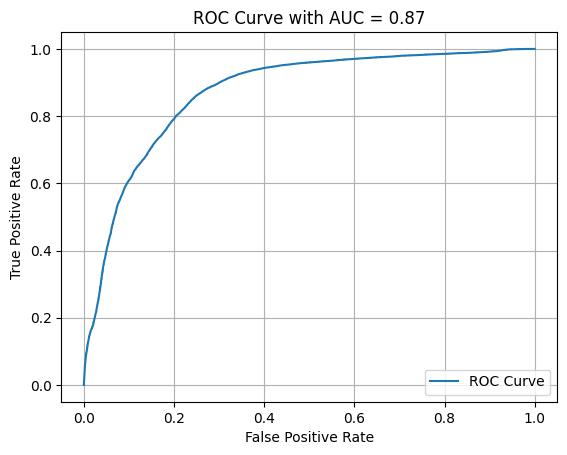

In [16]:
cross_val_scores = cross_val_score(Gnb, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = Gnb.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9588913343529675
Accuracy on Test set:  0.9511257159716359

Training Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    133334
           1       0.97      0.95      0.96    161543

    accuracy                           0.96    294877
   macro avg       0.96      0.96      0.96    294877
weighted avg       0.96      0.96      0.96    294877

Testing Results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     44549
           1       0.97      0.94      0.95     53744

    accuracy                           0.95     98293
   macro avg       0.95      0.95      0.95     98293
weighted avg       0.95      0.95      0.95     98293

Cross-Validation Scores for the Best Model: [0.95047138 0.95092919 0.95147096 0.95048749 0.95203052]
Average Cross-Validation Score: 0.9510779096207893


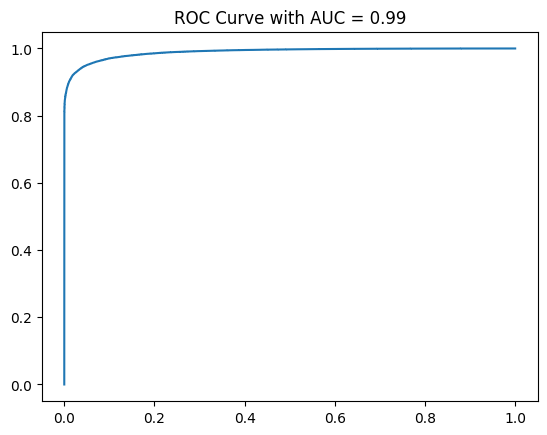

In [17]:

# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train7, y_train7)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train7)
y_pred_test4 = best_xg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

cross_val_scores = cross_val_score(best_xg, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.849632219535603
Accuracy on Test set:  0.8476188538349628

Training Results

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    133334
           1       0.85      0.88      0.86    161543

    accuracy                           0.85    294877
   macro avg       0.85      0.85      0.85    294877
weighted avg       0.85      0.85      0.85    294877

Testing Results

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     44549
           1       0.85      0.88      0.86     53744

    accuracy                           0.85     98293
   macro avg       0.85      0.84      0.85     98293
weighted avg       0.85      0.85      0.85     98293

Cross-Validation Scores for the Best Model: [0.85014243 0.85180412 0.8469521  0.84796948 0.84956337]
Average Cross-Validation Score: 0.8492863011562374


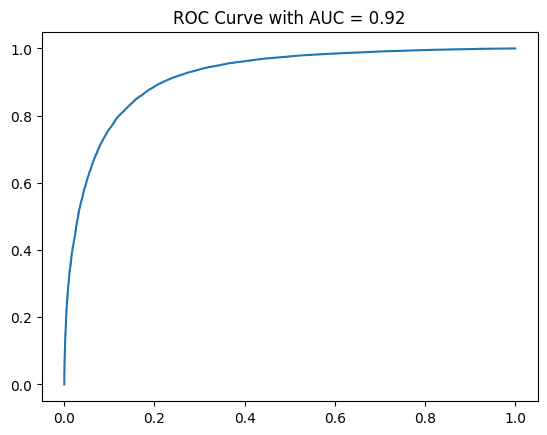

In [18]:

# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train7, y_train7)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train7)
y_pred_test4 = best_lg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

cross_val_scores = cross_val_score(best_lg, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## GradientBoostingClassifier


Accuracy on Training set:  0.9710319896092269
Accuracy on Test set:  0.9546966721943577

Training Results

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    133334
           1       0.98      0.97      0.97    161543

    accuracy                           0.97    294877
   macro avg       0.97      0.97      0.97    294877
weighted avg       0.97      0.97      0.97    294877

Testing Results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     44549
           1       0.97      0.95      0.96     53744

    accuracy                           0.95     98293
   macro avg       0.95      0.96      0.95     98293
weighted avg       0.95      0.95      0.95     98293

Cross-Validation Scores for the Best Model: [0.95411693 0.9534726  0.95520136 0.95372616 0.95435354]
Average Cross-Validation Score: 0.9541741158472983


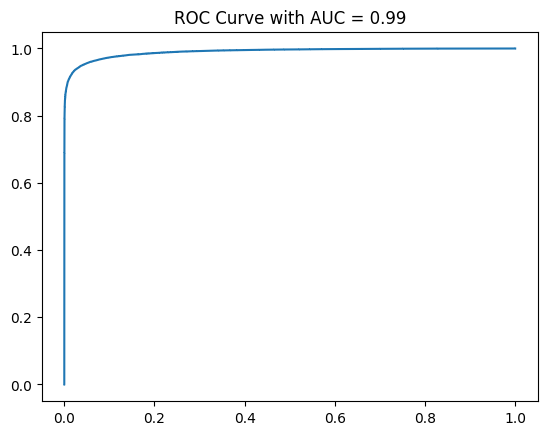

In [19]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_


params = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_split': 4,
    'min_samples_leaf': 2
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train7, y_train7)
# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train7)
y_pred_test6 = best_gb.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

cross_val_scores = cross_val_score(best_gb, x_train7, y_train7, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train7, y_train7)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train7, 
            y_train7)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.9606342184274956

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train6 = grid_cv.predict(x_train7)
y_pred_test6 = grid_cv.predict(x_test7)
print("XGBClassifier Accuracy: ",accuracy_score(y_test7, y_pred_test6))

XGBClassifier Accuracy:  0.9641581801349028


In [26]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train6))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    133334
           1       1.00      1.00      1.00    161543

    accuracy                           1.00    294877
   macro avg       1.00      1.00      1.00    294877
weighted avg       1.00      1.00      1.00    294877



In [27]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

Testing Results

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     44549
           1       0.96      0.98      0.97     53744

    accuracy                           0.96     98293
   macro avg       0.97      0.96      0.96     98293
weighted avg       0.96      0.96      0.96     98293



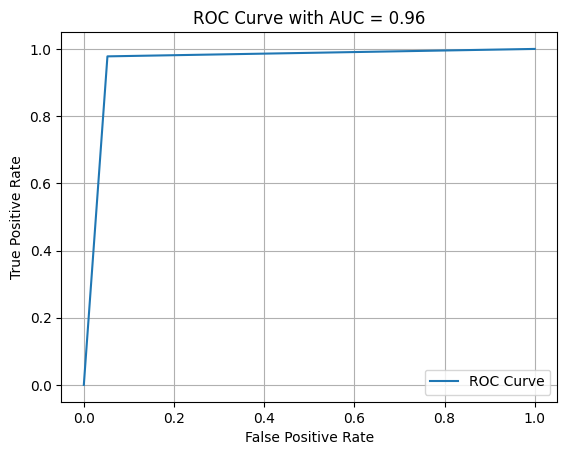

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = grid_cv.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train7, y_train7, batch_size = 32, epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


9215/9215 [==============================] - 31s 3ms/step - loss: 0.3472 - accuracy: 0.8510 - val_loss: 0.3265 - val_accuracy: 0.8623
Epoch 2/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.3026 - accuracy: 0.8724 - val_loss: 0.2980 - val_accuracy: 0.8738
Epoch 3/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.2810 - accuracy: 0.8809 - val_loss: 0.2803 - val_accuracy: 0.8807
Epoch 4/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.2691 - accuracy: 0.8852 - val_loss: 0.2695 - val_accuracy: 0.8851
Epoch 5/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.2626 - accuracy: 0.8883 - val_loss: 0.2628 - val_accuracy: 0.8881
Epoch 6/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.2588 - accuracy: 0.8895 - val_loss: 0.2586 - val_accuracy: 0.8894
Epoch 7/100
9215/9215 [==============================] - 29s 3ms/step - loss: 0.2552 - accuracy: 0.8906 - val_loss: 0.2558

In [36]:
ypred_train7 = ann.predict(x_train7)
y_pred_test7 = ann.predict(x_test7)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)
print(np.concatenate((y_pred_test7.reshape(len(y_pred_test7),1), y_test7.reshape(len(y_test7),1)),1))

3072/3072 [==============================] - 5s 2ms/step
[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [37]:
accuracy_score(y_test7, y_pred_test7)

0.9042352965114505

In [38]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train7))

Training Results



              precision    recall  f1-score   support

           0       0.91      0.88      0.89    133334
           1       0.90      0.93      0.92    161543

    accuracy                           0.91    294877
   macro avg       0.91      0.90      0.90    294877
weighted avg       0.91      0.91      0.91    294877



In [39]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test7))

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     44549
           1       0.90      0.93      0.91     53744

    accuracy                           0.90     98293
   macro avg       0.90      0.90      0.90     98293
weighted avg       0.90      0.90      0.90     98293



3072/3072 [==============================] - 5s 2ms/step


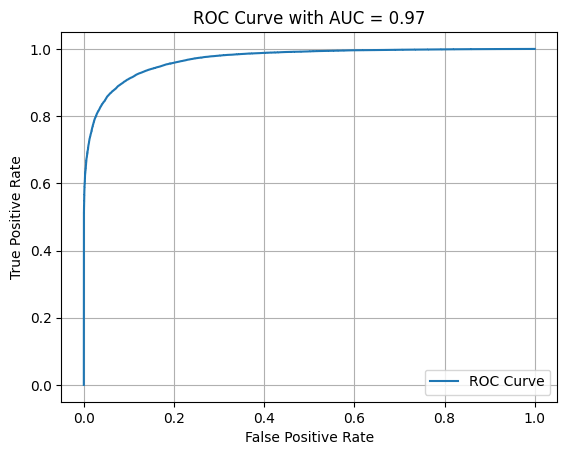

In [40]:
# cross_val_scores = cross_val_score(ann, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = ann.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
9215/9215 [==============================] - 28s 3ms/step - loss: 0.3346 - accuracy: 0.8588
Epoch 2/100
9215/9215 [==============================] - 26s 3ms/step - loss: 0.2782 - accuracy: 0.8830
Epoch 3/100
9215/9215 [==============================] - 27s 3ms/step - loss: 0.2550 - accuracy: 0.8925
Epoch 4/100
9215/9215 [==============================] - 26s 3ms/step - loss: 0.2455 - accuracy: 0.8957
Epoch 5/100
9215/9215 [==============================] - 26s 3ms/step - loss: 0.2409 - accuracy: 0.8976
Epoch 6/100
9215/9215 [==============================] - 25s 3ms/step - loss: 0.2382 - accuracy: 0.8984
Epoch 7/100
9215/9215 [==============================] - 25s 3ms/step - loss: 0.2352 - accuracy: 0.8997
Epoch 8/100
9215/9215 [==============================] - 25s 3ms/step - loss: 0.2336 - accuracy: 0.9006
Epoch 9/100
9215/9215 [==============================] - 25s 3ms/step - loss: 0.2323 - accuracy: 0.9005
Epoch 10/100
9215/9215 [==============================] - 26s 3m

In [42]:
model_2.evaluate(x_test7,y_test7)

3072/3072 [==============================] - 6s 2ms/step - loss: 0.2030 - accuracy: 0.9114


[0.20298171043395996, 0.9113568663597107]

In [43]:
ypred_train10 = model_2.predict(x_train7)
y_pred_test10 = model_2.predict(x_test7)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)

print(classification_report(y_train7,ypred_train10))
print(classification_report(y_test7,y_pred_test10))

3072/3072 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.91    133334
           1       0.93      0.91      0.92    161543

    accuracy                           0.91    294877
   macro avg       0.91      0.91      0.91    294877
weighted avg       0.91      0.91      0.91    294877

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     44549
           1       0.93      0.91      0.92     53744

    accuracy                           0.91     98293
   macro avg       0.91      0.91      0.91     98293
weighted avg       0.91      0.91      0.91     98293



3072/3072 [==============================] - 6s 2ms/step


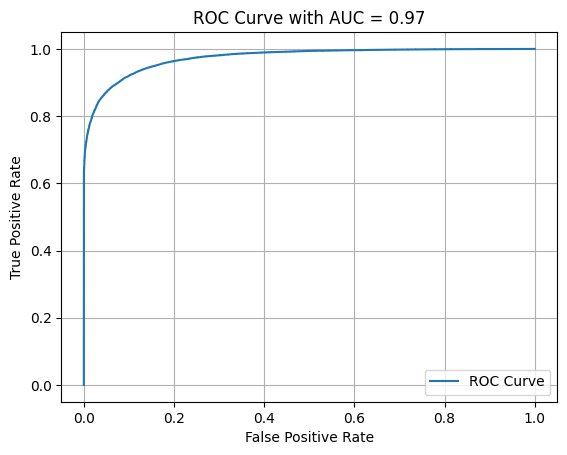

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [45]:

tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
9215/9215 [==============================] - 26s 3ms/step - loss: 0.3115 - accuracy: 0.8679
Epoch 2/100
9215/9215 [==============================] - 24s 3ms/step - loss: 0.2587 - accuracy: 0.8910
Epoch 3/100
9215/9215 [==============================] - 24s 3ms/step - loss: 0.2439 - accuracy: 0.8964
Epoch 4/100
9215/9215 [==============================] - 23s 3ms/step - loss: 0.2364 - accuracy: 0.8993
Epoch 5/100
9215/9215 [==============================] - 24s 3ms/step - loss: 0.2311 - accuracy: 0.9009
Epoch 6/100
9215/9215 [==============================] - 23s 2ms/step - loss: 0.2270 - accuracy: 0.9026
Epoch 7/100
9215/9215 [==============================] - 21s 2ms/step - loss: 0.2220 - accuracy: 0.9048
Epoch 8/100
9215/9215 [==============================] - 20s 2ms/step - loss: 0.2199 - accuracy: 0.9053
Epoch 9/100
9215/9215 [==============================] - 21s 2ms/step - loss: 0.2184 - accuracy: 0.9059
Epoch 10/100
9215/9215 [==============================] - 21s 2m

In [46]:
model_22.evaluate(x_test7,y_test7)

3072/3072 [==============================] - 4s 1ms/step - loss: 0.2005 - accuracy: 0.9137


[0.20054839551448822, 0.913727343082428]

In [47]:
ypred_train22 = model_22.predict(x_train7)
y_pred_test22 = model_22.predict(x_test7)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train7,ypred_train22))
print(classification_report(y_test7,y_pred_test22))

3072/3072 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    133334
           1       0.93      0.91      0.92    161543

    accuracy                           0.92    294877
   macro avg       0.92      0.92      0.92    294877
weighted avg       0.92      0.92      0.92    294877

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     44549
           1       0.93      0.91      0.92     53744

    accuracy                           0.91     98293
   macro avg       0.91      0.91      0.91     98293
weighted avg       0.91      0.91      0.91     98293



3072/3072 [==============================] - 4s 1ms/step


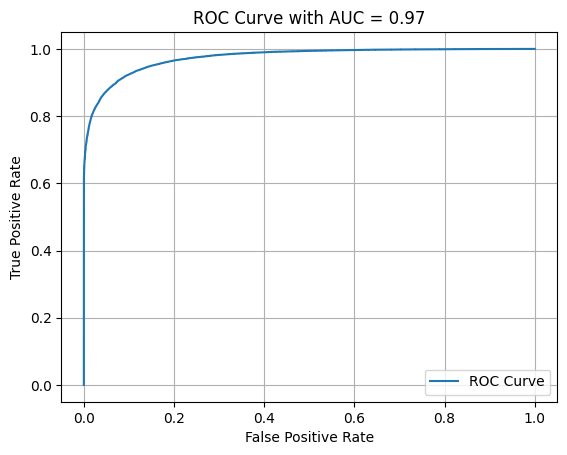

In [48]:
# cross_val_scores = cross_val_score(model_22, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_22.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [49]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model1.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
9215/9215 [==============================] - 20s 2ms/step - loss: 0.4385 - val_loss: 0.3479
Epoch 2/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3977 - val_loss: 0.3417
Epoch 3/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3915 - val_loss: 0.3415
Epoch 4/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3890 - val_loss: 0.3436
Epoch 5/100
9215/9215 [==============================] - 18s 2ms/step - loss: 0.3867 - val_loss: 0.3394
Epoch 6/100
9215/9215 [==============================] - 18s 2ms/step - loss: 0.3858 - val_loss: 0.3396
Epoch 7/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3847 - val_loss: 0.3411
Epoch 8/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3841 - val_loss: 0.3375
Epoch 9/100
9215/9215 [==============================] - 19s 2ms/step - loss: 0.3839 - val_loss: 0.3375
Epoch 10/100
9215/9215 [==============================] - 19s 2m

In [51]:

predictions = model1.predict(x_test7)

ypred_train11 = model1.predict(x_train7)
y_pred_test11 = model1.predict(x_test7)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)


print("Training Results\n")
print(classification_report(y_train7,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test7,y_pred_test11))

3072/3072 [==============================] - 3s 968us/step
Training Results

              precision    recall  f1-score   support

           0       0.85      0.85      0.85    133334
           1       0.87      0.87      0.87    161543

    accuracy                           0.86    294877
   macro avg       0.86      0.86      0.86    294877
weighted avg       0.86      0.86      0.86    294877

Testing Results

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     44549
           1       0.87      0.87      0.87     53744

    accuracy                           0.86     98293
   macro avg       0.86      0.86      0.86     98293
weighted avg       0.86      0.86      0.86     98293



3072/3072 [==============================] - 3s 962us/step


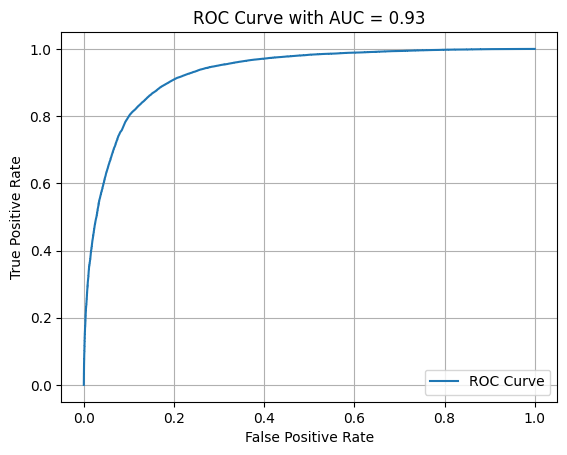

In [52]:
# cross_val_scores = cross_val_score(model1, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model1.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model2 = Sequential()



model2.add(Dense(16,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model2.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
9215/9215 [==============================] - 16s 2ms/step - loss: 0.3855 - val_loss: 0.3404
Epoch 2/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3528 - val_loss: 0.3324
Epoch 3/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3469 - val_loss: 0.3248
Epoch 4/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3392 - val_loss: 0.3156
Epoch 5/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3356 - val_loss: 0.3125
Epoch 6/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3332 - val_loss: 0.3099
Epoch 7/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3323 - val_loss: 0.3105
Epoch 8/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3323 - val_loss: 0.3074
Epoch 9/100
9215/9215 [==============================] - 14s 2ms/step - loss: 0.3304 - val_loss: 0.3073
Epoch 10/100
9215/9215 [==============================] - 14s 2m

In [55]:
ypred_train12 = model2.predict(x_train7)
y_pred_test12 = model2.predict(x_test7)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train7,ypred_train12))
print(classification_report(y_test7,y_pred_test12))

3072/3072 [==============================] - 2s 801us/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86    133334
           1       0.88      0.90      0.89    161543

    accuracy                           0.88    294877
   macro avg       0.88      0.88      0.88    294877
weighted avg       0.88      0.88      0.88    294877

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     44549
           1       0.88      0.89      0.89     53744

    accuracy                           0.88     98293
   macro avg       0.87      0.87      0.87     98293
weighted avg       0.88      0.88      0.88     98293



3072/3072 [==============================] - 3s 881us/step


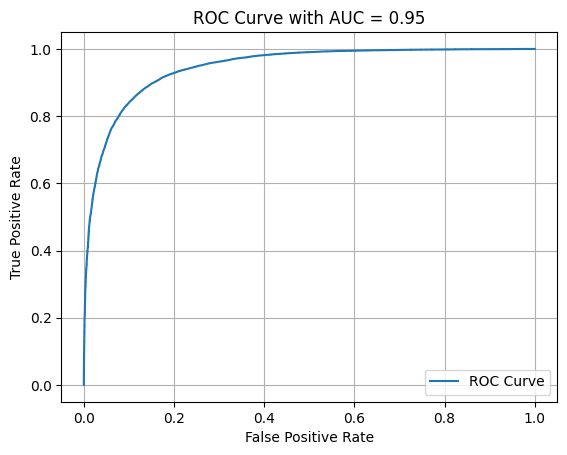

In [56]:
# cross_val_scores = cross_val_score(model2, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
# model3 = SVC(probability=True)

In [58]:
# model3.fit(x_train7,y_train7)

In [59]:
# ypred_train14 = model3.predict(x_train7)
# y_pred_test14 = model3.predict(x_test7)


# print(classification_report(y_train7,ypred_train14))
# print(classification_report(y_test7,y_pred_test14))

In [60]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
# grid.fit(x_train7,y_train7)

In [63]:
# grid.best_params_

In [64]:
# grid.best_estimator_

In [65]:
# ypred_train = grid.predict(x_train7)
# y_pred_test = grid.predict(x_test7)


# print(classification_report(y_train7,ypred_train))
# print(classification_report(y_test7,y_pred_test))

Training Results

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    133334
           1       0.96      0.94      0.95    161543

    accuracy                           0.94    294877
   macro avg       0.94      0.95      0.94    294877
weighted avg       0.94      0.94      0.94    294877

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     44549
           1       0.94      0.92      0.93     53744

    accuracy                           0.92     98293
   macro avg       0.92      0.92      0.92     98293
weighted avg       0.92      0.92      0.92     98293



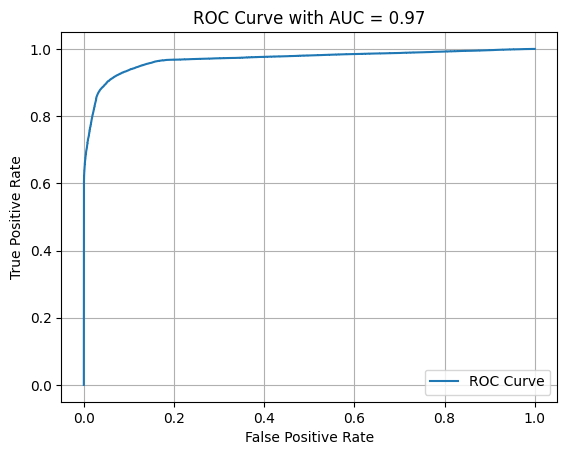

In [9]:
model3 = SVC(C=1000, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train7, y_train7)

ypred_train14 = model3.predict(x_train7)
y_pred_test14 = model3.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test7, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = model3.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()